## Deep Learning Project - Lumbar spine segmentation in MR images

This notebook is a part of the final project for the course "Deep Learning" at Innopolis University. The goal of the project is to develop a deep learning model for the segmentation of the lumbar spine in MR images. The dataset used in this project is the "Lumbar spine MRI images for bone segmentation" dataset from SPIDER Website. The dataset contains 447 MR images of the lumbar spine. The images are divided into two classes: the lumbar spine and the masks. The goal of the project is to develop a deep learning model that can accurately segment the lumbar spine in MR images.


## Group members:
- **Abdullah Abdulghany -- 231000115**
- **Saif Fouda -- 231001857**
- **Nada Salah -- 222000212**

## Project Structure:
    -[x] Data Preprocessing: In this section, we will load the dataset and preprocess it.
    -[ ] Model: In this section, we will define the model architecture.
    -[ ] Training: In this section, we will train the model.
    -[ ] Evaluation: In this section, we will evaluate the model.
    -[ ] Results: In this section, we will show the results of the model.
    -[ ] Conclusion: In this section, we will conclude the project.

### 1. Data Preprocessing:
- Read the images and labels from the .mha files.
- Convert mha to nii format to be able to read the images.
- Decode the images and labels.
- Resize the images to the desired size.
- Apply preprocess techniques to images and masks.

In [1]:
import importlib
import dataset
importlib.reload(dataset)
from dataset import *

# from model.unet import *
from model.unet_modified import *

##### Define Methods and Constants:
- Define the methods and constants that will be used in the project.
##### Obstacles:
- Extracting Sagittal images from the dataset required to define the axis of the images. and try to standardize the axis of the images to be able to extract the sagittal images.

In [2]:
# Set the paths
base_path = '../inputs/'
overview_path = os.path.join(base_path, 'overview.csv')
image_path = os.path.join(base_path, 'images/')
mask_path = os.path.join(base_path, 'masks/')
sagittal_view_list = {}
mask_list = {}

# load csv file based on manufacturer, filer and split data
train_df, validation_df = load_csv_file(overview_path, PHILIPS_HEALTHCARE)

# drop columns with NaN values
train_df = drop_nan_columns(train_df)
validation_df = drop_nan_columns(validation_df)

# print(train_df.head())
# print(validation_df.head())

# extract file names from the df
train_files = train_df['new_file_name'].values
validation_files = validation_df['new_file_name'].values

print(train_files)
print(validation_files)

['1_t1' '1_t2' '105_t1' '105_t2' '109_t1' '109_t2' '113_t1' '113_t2'
 '117_t1' '117_t2' '121_t1' '121_t2' '125_t1' '125_t2' '130_t1' '130_t2'
 '131_t1' '131_t2' '133_t1' '133_t2' '137_t1' '137_t2' '144_t1' '144_t2'
 '149_t1' '149_t2' '15_t1' '15_t2' '156_t1' '156_t2' '16_t1' '16_t2'
 '160_t1' '160_t2' '167_t1' '167_t2' '169_t1' '169_t2' '17_t1' '17_t2'
 '170_t1' '170_t2' '174_t1' '174_t2' '175_t1' '175_t2' '186_t1' '186_t2'
 '188_t1' '188_t2' '193_t1' '193_t2' '195_t1' '195_t2' '196_t1' '196_t2'
 '202_t1' '202_t2' '203_t1' '203_t2' '204_t1' '204_t2' '205_t1' '205_t2'
 '207_t1' '207_t2' '213_t1' '213_t2' '215_t1' '215_t2' '218_t1' '218_t2'
 '221_t1' '221_t2' '223_t1' '223_t2' '227_t1' '227_t2' '228_t1' '228_t2'
 '229_t1' '229_t2' '231_t1' '231_t2' '232_t1' '232_t2' '24_t1' '24_t2'
 '242_t1' '242_t2' '243_t1' '243_t2' '244_t1' '244_t2' '245_t1' '245_t2'
 '25_t1' '25_t2' '251_t1' '251_t2' '252_t1' '252_t2' '253_t1' '253_t2'
 '254_t1' '254_t2' '255_t1' '255_t2' '28_t1' '28_t2' '29_t1' '29_

In [3]:
# Find maximum dimensions for images
# max_dimensions, sagittal_view_list = find_max_dimensions(image_path, train_files)
# print("Max Dimension for images= ",max_dimensions)

# # Find maximum dimensions for masks
# max_dimensions_mask, mask_list = find_max_dimensions(mask_path, train_files)
# print("Max Dimension for Masks=",max_dimensions_mask)

# batch_convert_mha_to_nii(image_path)
# batch_convert_mha_to_nii(mask_path)

#### Plotting Images and Masks after extracting Sagittal view from the 3D image
- Plot the images and masks after extracting the Sagittal view from the 3D image.

#### Obstcale Detection
- Couldn't laod the masks images as segmentation masks.

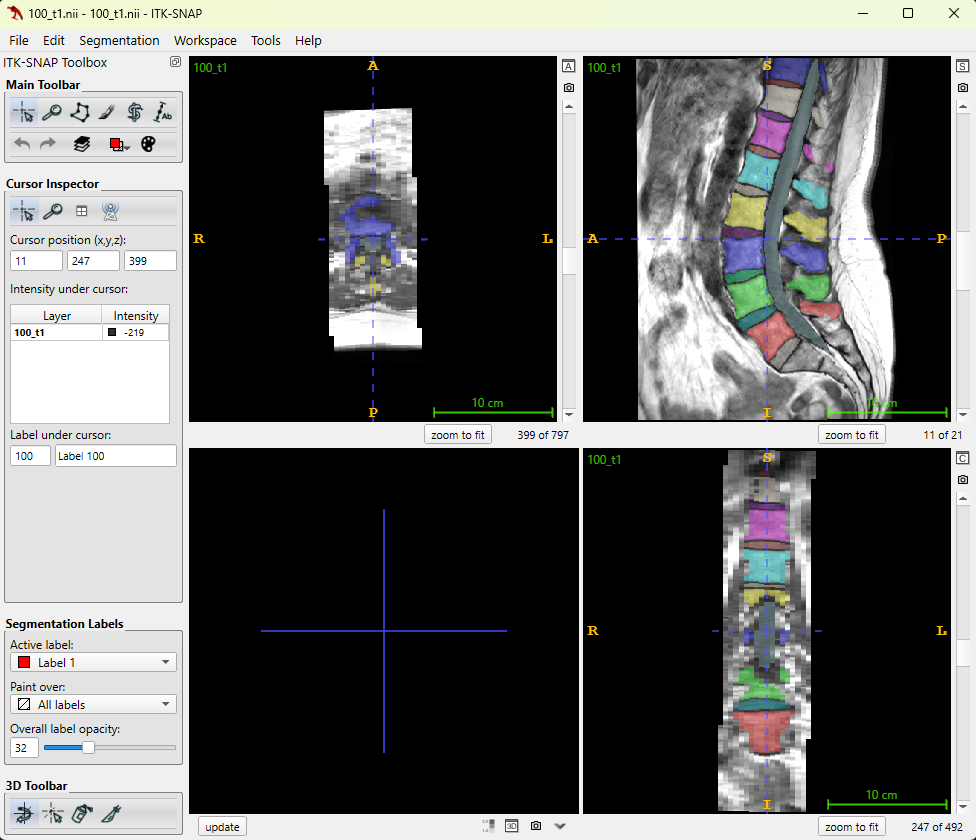


In [4]:
# Resample using sitk
resampled_images_list = resample_image_sitk(image_path, train_files, target_shape= TARGET_SHAPE, files_number=20)

# Resample masks
resampled_masks_list = resample_image_sitk(mask_path, train_files, target_shape= TARGET_SHAPE, files_number=20)

# Print the resampled images
print("Resampled Images List: ",resampled_images_list)
print("Resampled Masks List: ",resampled_masks_list)


# Rsample validation images and masks
resampled_images_list_val = resample_image_sitk(image_path, validation_files, target_shape= TARGET_SHAPE)
resampled_masks_list_val = resample_image_sitk(mask_path, validation_files, target_shape= TARGET_SHAPE)

# Print the resampled images
print("Resampled Images List Val: ",resampled_images_list_val)
print("Resampled Masks List Val: ",resampled_masks_list_val)

Resampled Images List:  ['../inputs/images/1_t1_sitk_0.nii', '../inputs/images/1_t2_sitk_1.nii', '../inputs/images/105_t1_sitk_2.nii', '../inputs/images/105_t2_sitk_3.nii', '../inputs/images/109_t1_sitk_4.nii', '../inputs/images/109_t2_sitk_5.nii', '../inputs/images/113_t1_sitk_6.nii', '../inputs/images/113_t2_sitk_7.nii', '../inputs/images/117_t1_sitk_8.nii', '../inputs/images/117_t2_sitk_9.nii', '../inputs/images/121_t1_sitk_10.nii', '../inputs/images/121_t2_sitk_11.nii', '../inputs/images/125_t1_sitk_12.nii', '../inputs/images/125_t2_sitk_13.nii', '../inputs/images/130_t1_sitk_14.nii', '../inputs/images/130_t2_sitk_15.nii', '../inputs/images/131_t1_sitk_16.nii', '../inputs/images/131_t2_sitk_17.nii', '../inputs/images/133_t1_sitk_18.nii', '../inputs/images/133_t2_sitk_19.nii']
Resampled Masks List:  ['../inputs/masks/1_t1_sitk_0.nii', '../inputs/masks/1_t2_sitk_1.nii', '../inputs/masks/105_t1_sitk_2.nii', '../inputs/masks/105_t2_sitk_3.nii', '../inputs/masks/109_t1_sitk_4.nii', '../

In [5]:
# from itkwidgets import view
# img = nib.load(resample_images_list[0]).get_fdata()
# view(img)


In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(torch.cuda.is_available())
print("Device:",device)

def load_nii_to_tensor(path):
    image = sitk.ReadImage(path)
    image_array = sitk.GetArrayFromImage(image)
    image_array = torch.tensor(image_array, dtype=torch.float32).to(device)
    return image_array

training_images = [load_nii_to_tensor(image) for image in resampled_images_list]
training_masks = [load_nii_to_tensor(image) for image in resampled_masks_list]

# print("Images: ",training_images)
# print("Masks: ",training_masks)


validation_images = [load_nii_to_tensor(image) for image in resampled_images_list_val]
validation_masks = [load_nii_to_tensor(image) for image in resampled_masks_list_val]

# Normalize images
# images = [(image - image.mean()) / image.std() for image in images]

True
Device: cuda


In [7]:
class MRIDataset(Dataset):
    def __init__(self, images, masks):
        self.images = images
        self.masks = masks
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        # Ensure the images and masks are in (C, D, H, W) format, where C is the channel dimension
        image = self.images[idx]
        mask = self.masks[idx]
        if len(image.shape) == 3:  # if there is no channel dimension
            image = image.unsqueeze(0)  # Add channel dimension at position 0
        if len(mask.shape) == 3:  # if there is no channel dimension
            mask = mask.unsqueeze(0)  # Add channel dimension at position 0
        
        # Ensure the mask has the same number of channels as the output
        if mask.shape[0] != 20:
            mask = mask.repeat(20, 1, 1, 1)  # Repeat mask along the channel dimension

        return image, mask

# Assuming `images` and `masks` are lists of 3D tensors
training_dataset = MRIDataset(training_images, training_masks)
training_dataloader = DataLoader(training_dataset, batch_size=2, shuffle=True)

# Validation dataset and dataloader
validation_dataset = MRIDataset(validation_images, validation_masks)
validation_dataloader = DataLoader(validation_dataset, batch_size=2, shuffle=True)


In [8]:
model = UNet(n_channels=1, n_classes= 20)  # grayscale images input, output segmented images with 20 channels
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
model.to(device)

UNet(
  (inc): DoubleConv(
    (double_conv): Sequential(
      (0): Conv3d(1, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (4): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (down1): Down(
    (maxpool_conv): Sequential(
      (0): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): DoubleConv(
        (double_conv): Sequential(
          (0): Conv3d(64, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          (1): BatchNorm3d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv3d(128, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          (4)

In [9]:
def show_image_and_mask(image, mask, prediction=None):
    fig, axs = plt.subplots(1, 3 if prediction is not None else 2, figsize=(15, 5))
    
    # Convert image to (H, W, C)
    if image.dim() == 4:  # Remove batch dimension if present
        image = image.squeeze(0)
    if image.size(0) == 1:  # If single channel, keep it as (H, W)
        image = image.squeeze(0)
    else:  # Convert from (C, H, W) to (H, W, C)
        image = image.permute(1, 2, 0)
    
    # Take mean across H dimension
    image_mean = image.mean(dim=0).cpu().numpy()
    
    # Plot the mean image
    axs[0].imshow(image_mean, cmap='gray')
    axs[0].set_title("Input Image Mean")
    
    if mask.dim() == 4:
        mask = mask.squeeze(0)
    axs[1].imshow(mask.cpu().numpy(), cmap='gray')
    axs[1].set_title("Ground Truth Mask")
    
    if prediction is not None:
        if prediction.dim() == 4:
            prediction = prediction.squeeze(0)
        axs[2].imshow(prediction.cpu().numpy(), cmap='gray')
        axs[2].set_title("Predicted Mask")
        
    for ax in axs:
        ax.axis('off')
    plt.show()

In [10]:
import matplotlib.pyplot as plt

num_epochs = 14
batch_size = 4
accumulation_steps = 4

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for step, (images, masks) in enumerate(training_dataloader):
        outputs = model(images)
        loss = criterion(outputs, masks) / accumulation_steps
        loss.backward()
        train_loss += loss.item()
        if (step + 1) % accumulation_steps == 0:
            optimizer.step()
            optimizer.zero_grad()
    train_losses.append(train_loss / len(training_dataloader))
    print(f'Epoch {epoch+1}, Training Loss: {train_loss / len(training_dataloader)}')
    
    # Model Evaluation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for step, (images, masks) in enumerate(validation_dataloader):
            inputs = images.to(device)
            masks = masks.to(device)
            
            outputs = model(inputs)
            if outputs.size() != masks.size():
                outputs = F.interpolate(outputs, size=masks.size()[2:], mode='trilinear', align_corners=True)
            loss = criterion(outputs, masks)
            preds = torch.sigmoid(outputs) > 0.5  # Adjust threshold as necessary
            val_loss += loss.item()  
    val_losses.append(val_loss / len(validation_dataloader))
    print(f'Epoch {epoch+1}, Validation Loss: {val_loss / len(validation_dataloader)}')

# Save the model
torch.save(model.state_dict(), 'model.pth')
torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'train_losses': train_losses,
        'val_losses': val_losses
    }, 'model.pth')

Input shape: torch.Size([2, 1, 128, 128, 64])
Shape after initial conv: torch.Size([2, 64, 128, 128, 64])
Shape after down1: torch.Size([2, 128, 64, 64, 32])
Shape after down2: torch.Size([2, 256, 32, 32, 16])
Shape after down3: torch.Size([2, 512, 16, 16, 8])
Shape after down4: torch.Size([2, 512, 8, 8, 4])
Shape after up1: torch.Size([2, 256, 16, 16, 8])
Shape after up2: torch.Size([2, 128, 32, 32, 16])
Shape after up3: torch.Size([2, 64, 64, 64, 32])
Shape after up4: torch.Size([2, 64, 128, 128, 64])
Output shape: torch.Size([2, 20, 128, 128, 64])
Input shape: torch.Size([2, 1, 128, 128, 64])
Shape after initial conv: torch.Size([2, 64, 128, 128, 64])
Shape after down1: torch.Size([2, 128, 64, 64, 32])
Shape after down2: torch.Size([2, 256, 32, 32, 16])
Shape after down3: torch.Size([2, 512, 16, 16, 8])
Shape after down4: torch.Size([2, 512, 8, 8, 4])
Shape after up1: torch.Size([2, 256, 16, 16, 8])
Shape after up2: torch.Size([2, 128, 32, 32, 16])
Shape after up3: torch.Size([2, 64

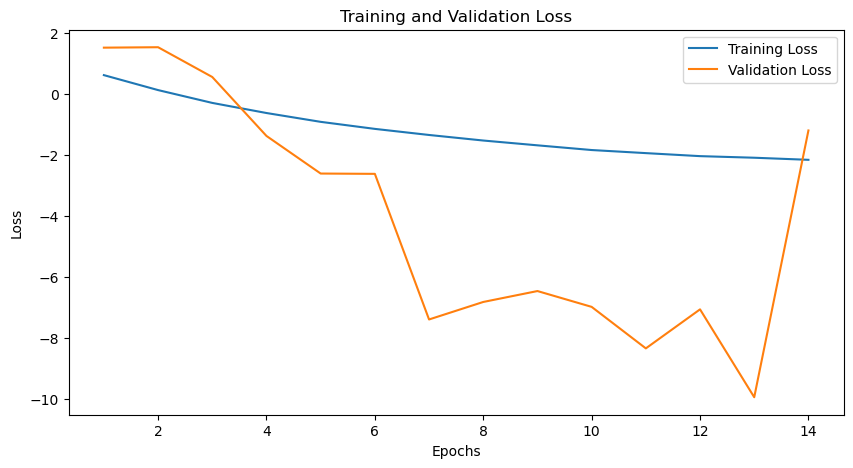

In [11]:
# Ensure train_losses and val_losses have the same length as num_epochs
assert len(train_losses) == num_epochs, f"train_losses length: {len(train_losses)}, expected: {num_epochs}"
assert len(val_losses) == num_epochs, f"val_losses length: {len(val_losses)}, expected: {num_epochs}"

# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### Apply enhancment Techniques
- [x] Apply CLAHE technique to enhance the contrast of the images.
- [ ] Apply Gaussian Blur to smooth the images.
- [ ] Apply Histogram Equalization to enhance the contrast of the images.
- [ ] Apply Random Noise to the images.
- [x] Apply Rotation to the images.

The above techniques will help in improving the performance of the model. for the demo purpose, We have applied only the CLAHE technique to enhance the contrast of the images.